In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
input_shape = (28,28,1)

In [3]:
def plotData(history, metric):
    
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_"+metric]
    
    epochs = range(1, len(train_metrics)+1)
    
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)
    
    plt.title("Training&Validation"+metric)
    
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,"val_"+metric])
    
    plt.show()

In [4]:
def plotLR(history):
    
    learning_rate = history.history["lr"]
    epochs = range(1, len(learning_rate)+1) #range(0,5): 0,1,2,3,4
    
    plt.plot(epochs, learning_rate)    
    
    plt.title("Learning Rate")
    
    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")
    
    plt.show()

In [5]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("Shape of Train Images:", train_images.shape)
print("Shape of Test Images:", test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

def mnist_model(input_shape):
    model = Sequential([
                        Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128,activation="relu"),
                        Dropout(0.2),
                        Dense(10, activation="softmax")
                        ])
    
    model.compile(
                  optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                 )
    
    return model

In [7]:
model = mnist_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()

history_early_stopping = model.fit( 
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping]
                                    )

Epoch 1/50
750/750 - 18s - loss: 0.9360 - accuracy: 0.8398 - val_loss: 0.2568 - val_accuracy: 0.9362 - 18s/epoch - 23ms/step
Epoch 2/50
750/750 - 17s - loss: 0.2921 - accuracy: 0.9185 - val_loss: 0.1673 - val_accuracy: 0.9595 - 17s/epoch - 23ms/step
Epoch 3/50
750/750 - 16s - loss: 0.2188 - accuracy: 0.9409 - val_loss: 0.1490 - val_accuracy: 0.9633 - 16s/epoch - 21ms/step
Epoch 4/50
750/750 - 17s - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.1415 - val_accuracy: 0.9678 - 17s/epoch - 22ms/step
Epoch 5/50
750/750 - 17s - loss: 0.1422 - accuracy: 0.9584 - val_loss: 0.1481 - val_accuracy: 0.9628 - 17s/epoch - 23ms/step


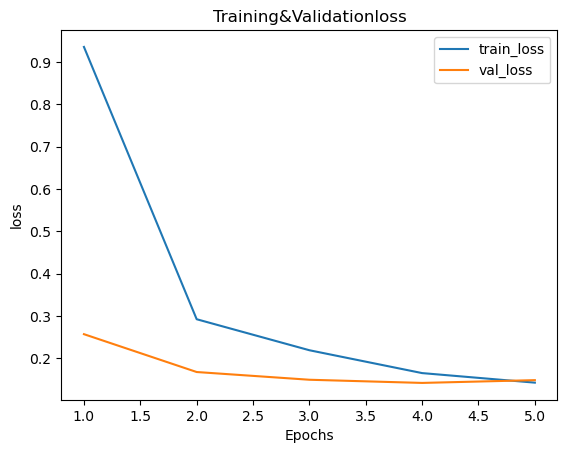

In [9]:
plotData(history_early_stopping, "loss")

In [10]:
model = mnist_model(input_shape)

early_stopping_1 = EarlyStopping(
                                 monitor = "val_accuracy", 
                                 patience = 3,
                                 min_delta = 0.001,
                                 mode="auto"
                                )

history_early_stopping_1 = model.fit( 
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping_1]
                                    )

Epoch 1/50
750/750 - 18s - loss: 1.0705 - accuracy: 0.8471 - val_loss: 0.2611 - val_accuracy: 0.9333 - 18s/epoch - 24ms/step
Epoch 2/50
750/750 - 16s - loss: 0.2875 - accuracy: 0.9238 - val_loss: 0.1526 - val_accuracy: 0.9593 - 16s/epoch - 21ms/step
Epoch 3/50
750/750 - 16s - loss: 0.1975 - accuracy: 0.9446 - val_loss: 0.1677 - val_accuracy: 0.9570 - 16s/epoch - 21ms/step
Epoch 4/50
750/750 - 15s - loss: 0.1636 - accuracy: 0.9538 - val_loss: 0.1248 - val_accuracy: 0.9694 - 15s/epoch - 21ms/step
Epoch 5/50
750/750 - 14s - loss: 0.1336 - accuracy: 0.9617 - val_loss: 0.1402 - val_accuracy: 0.9663 - 14s/epoch - 19ms/step
Epoch 6/50
750/750 - 16s - loss: 0.1297 - accuracy: 0.9634 - val_loss: 0.1103 - val_accuracy: 0.9721 - 16s/epoch - 21ms/step
Epoch 7/50
750/750 - 16s - loss: 0.1131 - accuracy: 0.9669 - val_loss: 0.1424 - val_accuracy: 0.9716 - 16s/epoch - 21ms/step
Epoch 8/50
750/750 - 16s - loss: 0.1126 - accuracy: 0.9680 - val_loss: 0.1374 - val_accuracy: 0.9705 - 16s/epoch - 22ms/step


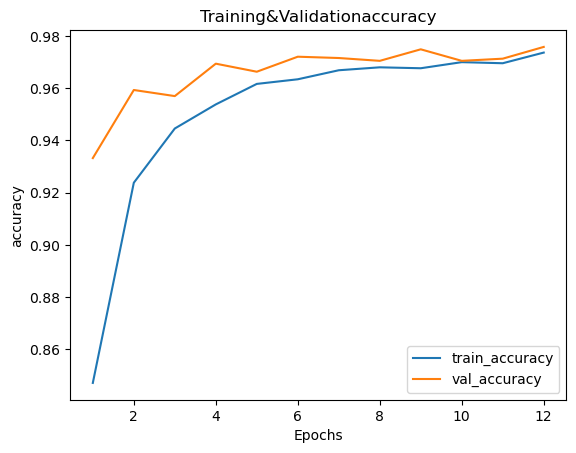

In [11]:
plotData(history_early_stopping_1, "accuracy")

In [12]:
from keras.callbacks import CSVLogger

csv = CSVLogger("logs/result.csv")
model = mnist_model(input_shape)

history_csv_logger = model.fit( 
                                x = train_images,
                                y = train_labels,
                                epochs = 20,
                                validation_split = 0.20,
                                batch_size = 64,
                                verbose = 2,
                                callbacks = [csv]
                                )

Epoch 1/20
750/750 - 17s - loss: 0.9298 - accuracy: 0.8341 - val_loss: 0.2781 - val_accuracy: 0.9340 - 17s/epoch - 23ms/step
Epoch 2/20
750/750 - 16s - loss: 0.2989 - accuracy: 0.9165 - val_loss: 0.1657 - val_accuracy: 0.9582 - 16s/epoch - 21ms/step
Epoch 3/20
750/750 - 16s - loss: 0.2107 - accuracy: 0.9387 - val_loss: 0.1532 - val_accuracy: 0.9660 - 16s/epoch - 21ms/step
Epoch 4/20
750/750 - 16s - loss: 0.1654 - accuracy: 0.9514 - val_loss: 0.1498 - val_accuracy: 0.9654 - 16s/epoch - 21ms/step
Epoch 5/20
750/750 - 14s - loss: 0.1420 - accuracy: 0.9583 - val_loss: 0.1348 - val_accuracy: 0.9668 - 14s/epoch - 19ms/step
Epoch 6/20
750/750 - 15s - loss: 0.1310 - accuracy: 0.9618 - val_loss: 0.1455 - val_accuracy: 0.9665 - 15s/epoch - 21ms/step
Epoch 7/20
750/750 - 17s - loss: 0.1273 - accuracy: 0.9634 - val_loss: 0.1253 - val_accuracy: 0.9720 - 17s/epoch - 22ms/step
Epoch 8/20
750/750 - 16s - loss: 0.1140 - accuracy: 0.9665 - val_loss: 0.1456 - val_accuracy: 0.9676 - 16s/epoch - 22ms/step


In [13]:
# !pip install pandas 
import pandas as pd

pd.read_csv("logs/result.csv", index_col="epoch")

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.834104,0.929759,0.934000,0.278097
1,0.916479,0.298870,0.958250,0.165700
2,0.938729,0.210746,0.966000,0.153236
3,0.951437,0.165404,0.965417,0.149797
4,0.958313,0.141977,0.966750,0.134794
5,0.961792,0.131047,0.966500,0.145461
6,0.963396,0.127271,0.972000,0.125292
7,0.966542,0.114008,0.967583,0.145568
8,0.968521,0.110334,0.969167,0.133493


In [ ]:
from keras.callbacks import ModelCheckpoint

path = "models/"

checkpoint = ModelCheckpoint(filepath = path,
                             save_freq = "epoch",
                             save_weights_only = True,
                             verbose = 1
                            )

model = mnist_model(input_shape)

history_checkpoint = model.fit( 
                                x = train_images,
                                y = train_labels,
                                epochs = 10,
                                validation_split = 0.20,
                                batch_size = 64,
                                verbose = 2,
                                callbacks = [checkpoint]
                                )

In [17]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
                              monitor = "val_loss",
                              factor = 0.2,
                              patience = 0,
                              verbose = 2
                             )

model = mnist_model(input_shape)

history_reduce_lr = model.fit( 
                                x = train_images,
                                y = train_labels,
                                epochs = 20,
                                validation_split = 0.20,
                                batch_size = 64,
                                verbose = 2,
                                callbacks = [reduce_lr]
                                )

Epoch 1/20
750/750 - 17s - loss: 1.1473 - accuracy: 0.8489 - val_loss: 0.2702 - val_accuracy: 0.9350 - lr: 0.0010 - 17s/epoch - 23ms/step
Epoch 2/20
750/750 - 16s - loss: 0.2913 - accuracy: 0.9200 - val_loss: 0.1750 - val_accuracy: 0.9566 - lr: 0.0010 - 16s/epoch - 22ms/step
Epoch 3/20
750/750 - 16s - loss: 0.2153 - accuracy: 0.9397 - val_loss: 0.1641 - val_accuracy: 0.9603 - lr: 0.0010 - 16s/epoch - 21ms/step
Epoch 4/20
750/750 - 16s - loss: 0.1658 - accuracy: 0.9525 - val_loss: 0.1514 - val_accuracy: 0.9663 - lr: 0.0010 - 16s/epoch - 21ms/step
Epoch 5/20
750/750 - 16s - loss: 0.1541 - accuracy: 0.9556 - val_loss: 0.1470 - val_accuracy: 0.9668 - lr: 0.0010 - 16s/epoch - 21ms/step
Epoch 6/20
750/750 - 16s - loss: 0.1400 - accuracy: 0.9592 - val_loss: 0.1222 - val_accuracy: 0.9722 - lr: 0.0010 - 16s/epoch - 21ms/step
Epoch 7/20

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
750/750 - 16s - loss: 0.1263 - accuracy: 0.9648 - val_loss: 0.1253 - val_accuracy: 

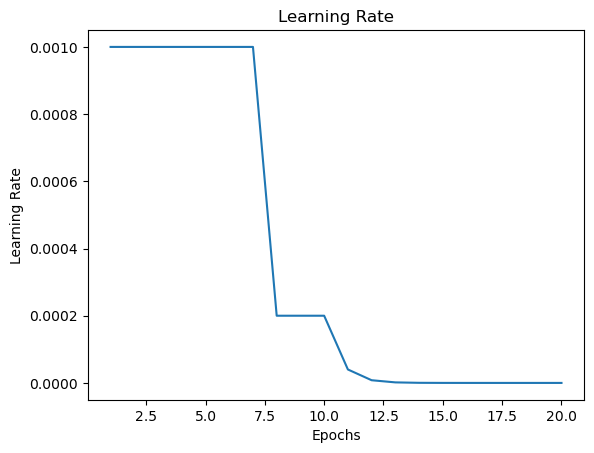

In [18]:
plotLR(history_reduce_lr)

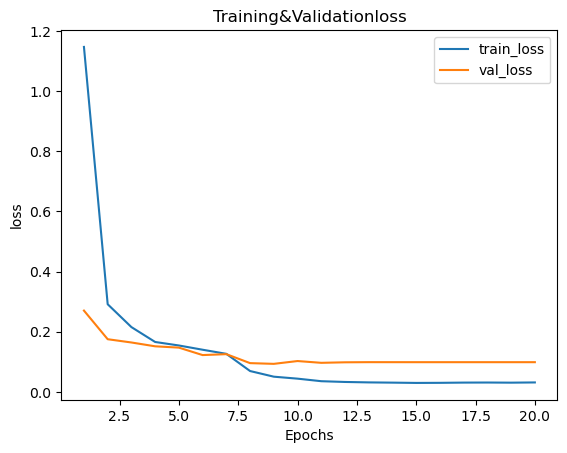

In [19]:
plotData(history_reduce_lr, "loss")

In [20]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    

model = mnist_model(input_shape)

history_lr_scheduler = model.fit( 
                                x = train_images,
                                y = train_labels,
                                epochs = 20,
                                validation_split = 0.20,
                                batch_size = 64,
                                verbose = 2,
                                callbacks = [LearningRateScheduler(scheduler, verbose=1)]
                                )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
750/750 - 17s - loss: 1.0094 - accuracy: 0.8423 - val_loss: 0.2292 - val_accuracy: 0.9417 - lr: 0.0010 - 17s/epoch - 22ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
750/750 - 16s - loss: 0.2850 - accuracy: 0.9218 - val_loss: 0.1908 - val_accuracy: 0.9511 - lr: 0.0010 - 16s/epoch - 21ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
750/750 - 17s - loss: 0.2067 - accuracy: 0.9405 - val_loss: 0.1747 - val_accuracy: 0.9597 - lr: 0.0010 - 17s/epoch - 22ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
750/750 - 20s - loss: 0.1632 - accuracy: 0.9533 - val_loss: 0.1509 - val_accuracy: 0.9646 - lr: 0.0010 - 20s/epoch - 26ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
750/750 - 16s - loss: 0.1365 - accura

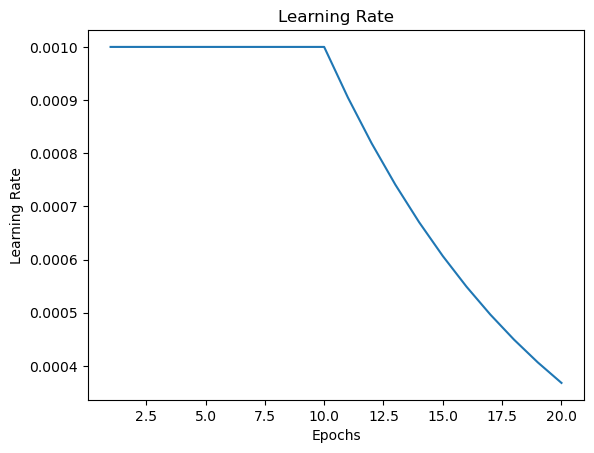

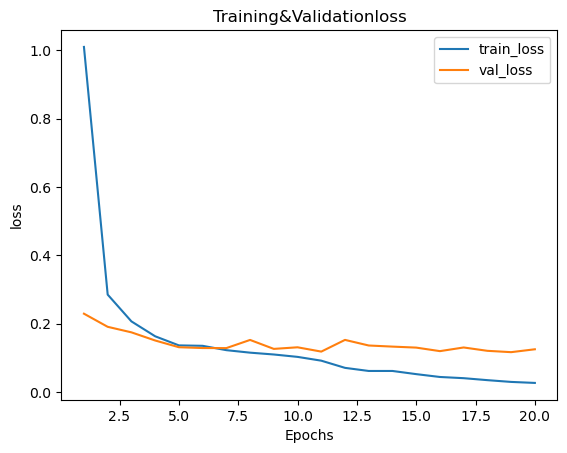

In [21]:
plotLR(history_lr_scheduler)
plotData(history_lr_scheduler, "loss")